# Forecast

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import m5.config as cfg
from m5.model import train, predict
from m5.evaluate import accuracy
from m5.plot import plot_fcst

# Library settings
pd.options.display.max_columns = 999
plt.rcParams["figure.figsize"] = (14, 4)

## Parameters

In [3]:
level = 1

In [4]:
# Parameters
level = 1


## Train

In [5]:
params = {
    "task": "train",
    "objective": "tweedie",
    "num_iterations": 1000,
    "learning_rate": 0.1,
    "num_leaves": 31,
    "num_threads": 4,
    "early_stopping_round": 100,
}

In [6]:
train(cfg.DATA_DIR, cfg.MODEL_DIR, level, params)

Training model...
[LightGBM] [Info] Load from binary file /home/ariel/Playground/m5-forecasting/data/processed/datasets/1/train.bin
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3652
[LightGBM] [Info] Number of data points in the train set: 1844, number of used features: 25
[LightGBM] [Info] Start training from score 10.446018
[1]	valid_0's tweedie: 825.787
Training until validation scores don't improve for 100 rounds
[2]	valid_0's tweedie: 824.944
[3]	valid_0's tweedie: 824.221
[4]	valid_0's tweedie: 823.725
[5]	valid_0's tweedie: 823.243
[6]	valid_0's tweedie: 822.81
[7]	valid_0's tweedie: 822.514
[8]	valid_0's tweedie: 822.175
[9]	valid_0's tweedie: 821.936
[10]	valid_0's tweedie: 821.704
[11]	valid_0's tweedie: 821.482
[12]	valid_0's tweedie: 821.321
[13]	valid_0's tweedie: 821.149
[14]	valid_0's tweedie: 821.016
[15]	valid_0's tweedie:

/home/ariel/anaconda3/envs/merlion/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/home/ariel/anaconda3/envs/merlion/lib/python3.9/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[258]	valid_0's tweedie: 819.96
[259]	valid_0's tweedie: 819.959
[260]	valid_0's tweedie: 819.959
[261]	valid_0's tweedie: 819.959
[262]	valid_0's tweedie: 819.958
[263]	valid_0's tweedie: 819.96
[264]	valid_0's tweedie: 819.96
[265]	valid_0's tweedie: 819.96
[266]	valid_0's tweedie: 819.96
[267]	valid_0's tweedie: 819.961
[268]	valid_0's tweedie: 819.961
[269]	valid_0's tweedie: 819.961
[270]	valid_0's tweedie: 819.96
[271]	valid_0's tweedie: 819.96
[272]	valid_0's tweedie: 819.96
[273]	valid_0's tweedie: 819.958
[274]	valid_0's tweedie: 819.958
[275]	valid_0's tweedie: 819.958
[276]	valid_0's tweedie: 819.958
[277]	valid_0's tweedie: 819.958
[278]	valid_0's tweedie: 819.959
[279]	valid_0's tweedie: 819.959
[280]	valid_0's tweedie: 819.962
[281]	valid_0's tweedie: 819.961
[282]	valid_0's tweedie: 819.961
[283]	valid_0's tweedie: 819.96
[284]	valid_0's tweedie: 819.96
[285]	valid_0's tweedie: 819.96
[286]	valid_0's tweedie: 819.96
[287]	valid_0's tweedie: 819.96
[288]	valid_0's tweedie

## Predict

In [7]:
fcst = predict(cfg.DATA_DIR, cfg.MODEL_DIR, cfg.FCST_DIR, level)
fcst

,d,sales,fcst
1885,1886,36041,35437.815248
1886,1887,33857,34493.604846
1887,1888,32359,34687.205871
1888,1889,34681,36123.880395
1889,1890,45536,39219.951365
1890,1891,52672,50904.829709
1891,1892,56425,51326.290214
1892,1893,40418,37326.951171
1893,1894,39683,39573.054603
1894,1895,39134,38123.550792


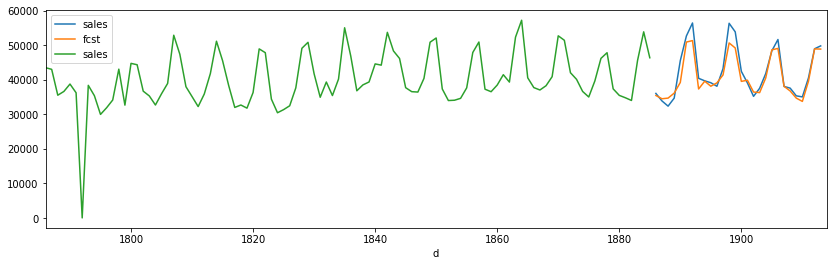

In [8]:
plot_fcst(cfg.DATA_DIR, cfg.FCST_DIR, level=level)

## Evaluate

In [9]:
accuracy_df = accuracy(cfg.DATA_DIR, cfg.FCST_DIR, cfg.METRICS_DIR, level)
accuracy_df

,mse_naive_insample,mse_fcst,weights,msse,rmsse,wrmsse
0,3.495457e+07,6.119079e+06,1,0.175058,0.418399,0.418399


In [10]:
accuracy_df["weights"].sum()

1

In [11]:
accuracy_df["wrmsse"].sum()

0.4183993630250636

## Misc